 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [347]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns
#Read the Whale Portfolio daily returns and clean the data
# Reading whale returns

In [348]:
# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")
whale = pd.read_csv(
    whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True
)
whale.sort_index(inplace=True)
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [349]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [350]:
# Drop nulls
whale.dropna(inplace=True)
whale.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [351]:
# Reading algorithmic returns
# Reading algo returns
algo_data = Path("Resources/algo_returns.csv")
algo = pd.read_csv(
    algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True
)
algo.sort_index(inplace=True)
algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [352]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [353]:
# Drop nulls
algo.dropna(inplace=True)
algo.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [357]:
# Reading S&P 500 Closing Prices
# Reading sp500 returns
sp500_data = Path("Resources/sp500_history.csv")
sp500 = pd.read_csv(
    sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True
)
sp500.sort_index(inplace=True)
sp500.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [358]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [359]:
#check Data Types
algo.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [360]:
#check Data Types
whale.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [361]:
# Fix Data Types
sp500["Close"] = sp500["Close"].str.replace("$", "")

In [362]:
# Convert 'Close' from 'object' to 'float'
sp500["Close"] = sp500["Close"].astype("float")
sp500.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [363]:
# Calculate Daily Returns

#Method 1

daily_returns_sp500 = (sp500 - sp500.shift(1)) / sp500.shift(1)
daily_returns_sp500.head()

#Method 2
#returns = sp500.pct_change()
#returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [364]:
# Drop nulls
daily_returns_sp500.dropna(inplace=True)
daily_returns_sp500.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [365]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp500 = pd.DataFrame(daily_returns_sp500)

daily_returns_pd.rename(columns = {'Close': 'Final Return'}, inplace = True)

print(daily_returns_sp500)

               Close
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457
...              ...
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841

[1648 rows x 1 columns]


In [366]:
daily_returns_whale = whale.pct_change()
daily_returns_whale = daily_returns_whale.dropna()
daily_returns_whale

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672
...,...,...,...,...
2019-04-25,-1.124733,-2.279801,0.288325,-1.759149
2019-04-26,-29.607053,-8.097525,-3.397536,1.152302
2019-04-29,-0.846082,-0.703202,-0.494071,-0.499394


In [367]:
daily_returns_algo = algo.pct_change()
daily_returns_algo = daily_returns_algo.dropna()
daily_returns_algo

,Algo 1,Algo 2
Date,,
2014-06-06,-0.542965,-0.376459
2014-06-09,-3.699288,-0.315757
2014-06-10,-1.879164,-1.129760
2014-06-11,0.080354,4.113963
2014-06-12,-1.005932,0.021230
...,...,...
2019-04-25,-0.376856,-19.155605
2019-04-26,3.368191,-1.725170
2019-04-29,0.746958,-0.461657


## Combine Whale, Algorithmic, and S&P 500 Returns

In [368]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
Combined_Returns = pd.concat([daily_returns_whale,daily_returns_algo,daily_returns_sp500], axis="columns", join="inner")
Combined_Returns.sort_index(inplace=True)
Combined_Returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.004389
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.001196
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-0.014174
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,0.003944
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672,-0.744524,-10.327163,-0.016961


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

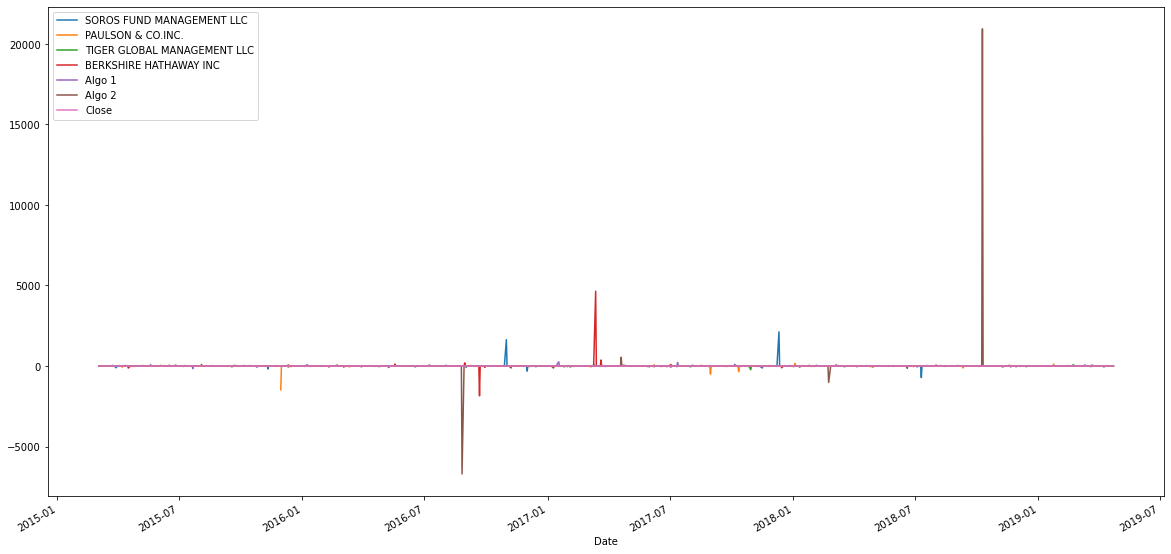

In [370]:
# Plot daily returns of all portfolios
Combined_Returns.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

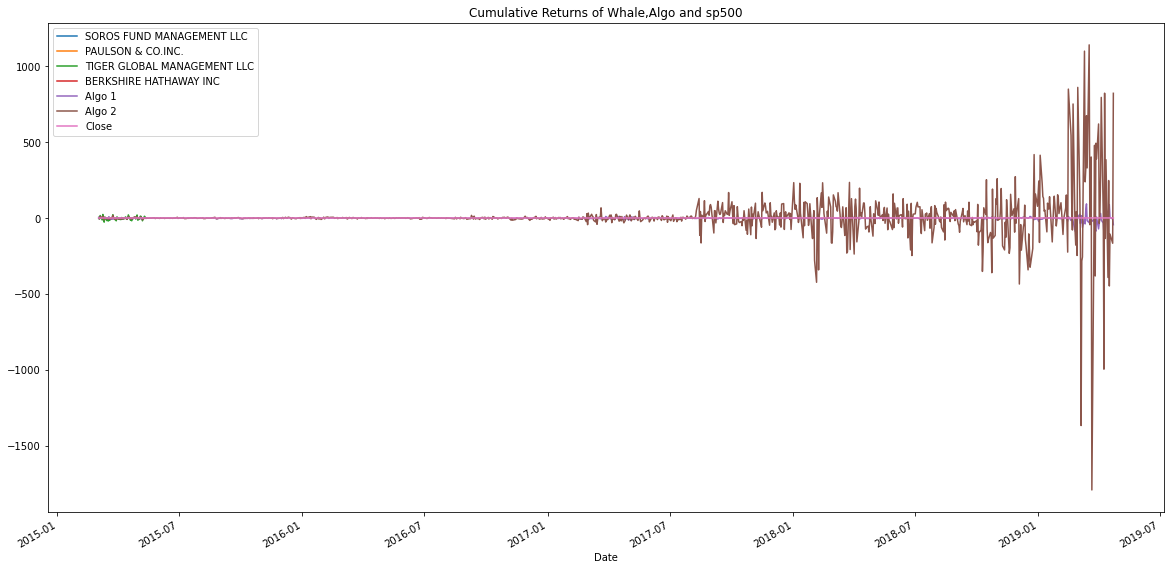

In [375]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + Combined_Returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns of Whale,Algo and sp500")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


C:\Users\aduri\anaconda3\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


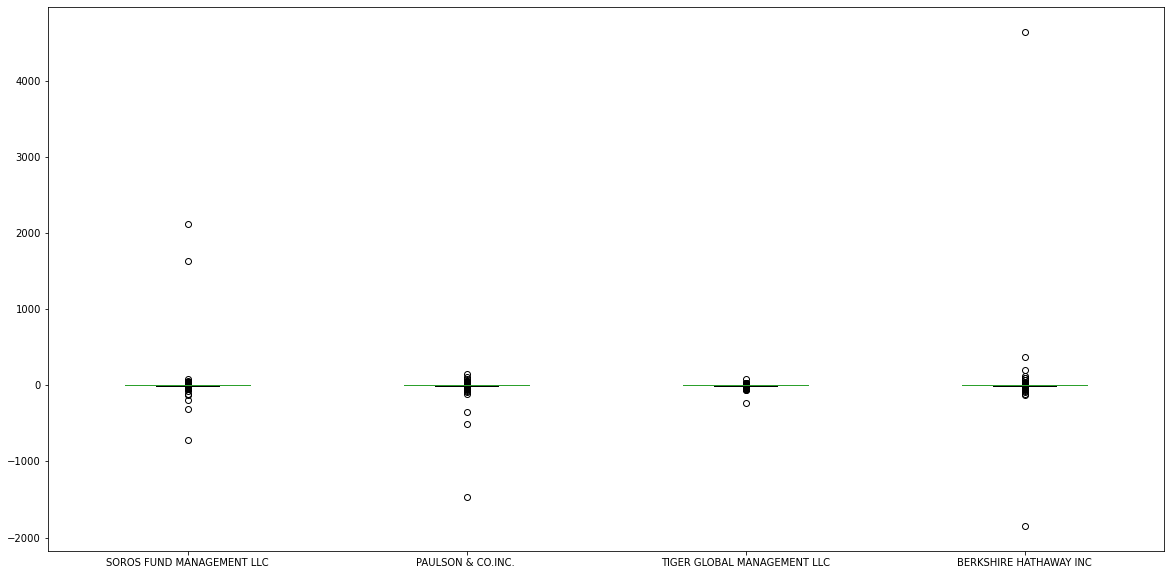

In [377]:
# Box plot to visually show risk
daily_returns_whale.plot(kind='box',figsize=(20,10))

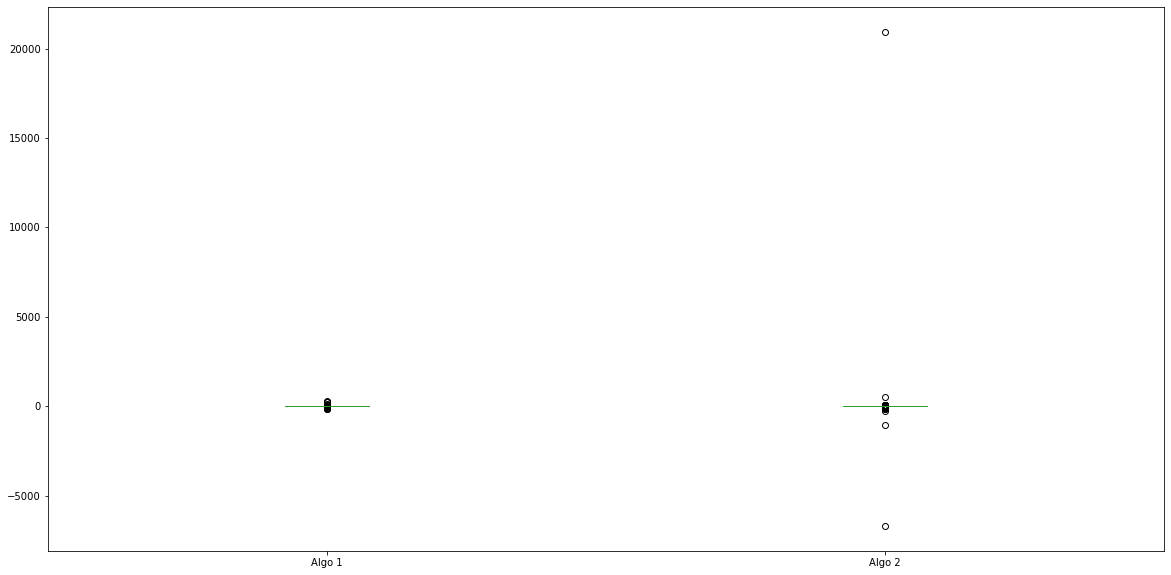

In [378]:
# Box plot to visually show risk
daily_returns_algo.plot(kind='box',figsize=(20,10))
#daily_returns_whale,daily_returns_algo,daily_returns_sp500

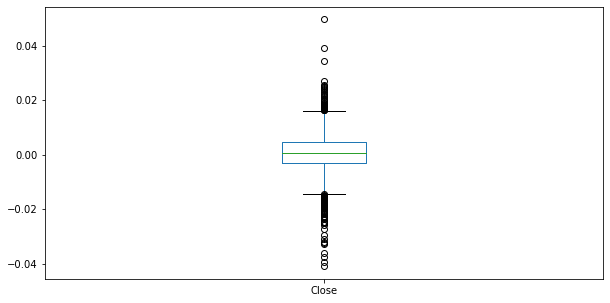

In [379]:
# Box plot to visually show risk
daily_returns_sp500.plot(kind='box',figsize=(10,5))

### Calculate Standard Deviations

In [380]:
# Calculate the daily standard deviations of all portfolios
Combined_Returns.std()

SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
Algo 1                          15.805676
Algo 2                         686.483154
Close                            0.008572
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [381]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = daily_returns_sp500.std()
sp500_std.head()

Close    0.008111
dtype: float64

### Calculate the Annualized Standard Deviation

In [382]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = cumulative_returns.std() * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC       65.742895
PAULSON & CO.INC.               13.604712
TIGER GLOBAL MANAGEMENT LLC    184.822430
BERKSHIRE HATHAWAY INC          16.138565
Algo 1                         157.281353
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

[]

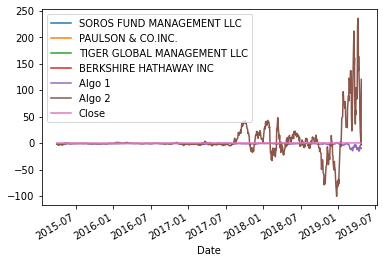

In [389]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
cumulative_returns_21ma = cumulative_returns.rolling(window=21).mean().plot()
#CHECK THE DAYS 21 In place of years shown in plot
# Plot the rolling standard deviation
cumulative_returns_21ma.plot(figsize=(20,10))

### Calculate and plot the correlation

In [395]:
# Calculate the correlation
correlation_df = cumulative_returns.corr()

# Display de correlation matrix
correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
SOROS FUND MANAGEMENT LLC,1.000000,0.736194,0.851043,0.837398,0.260186,0.793469,-0.252230
PAULSON & CO.INC.,0.736194,1.000000,0.733922,0.701082,0.088972,0.725440,-0.050942
TIGER GLOBAL MANAGEMENT LLC,0.851043,0.733922,1.000000,0.802951,0.182693,0.873316,-0.298506
BERKSHIRE HATHAWAY INC,0.837398,0.701082,0.802951,1.000000,0.182066,0.825354,-0.303186
Algo 1,0.260186,0.088972,0.182693,0.182066,1.000000,0.036864,-0.044181
Algo 2,0.793469,0.725440,0.873316,0.825354,0.036864,1.000000,0.067080
Close,-0.252230,-0.050942,-0.298506,-0.303186,-0.044181,0.067080,1.000000


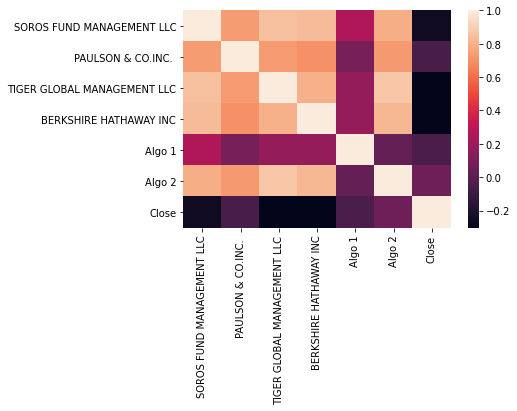

In [391]:
#correlation_df.sum(axis=0).sort_values()
sns.heatmap(correlation_df)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [396]:
# Calculate covariance of a single portfolio
covariance_algo = daily_returns_algo['Algo 1'].cov(cumulative_returns['Close'])
covariance_algo

0.06795258333172219

In [397]:
variance = cumulative_returns['Close'].var()
variance

0.0180312334199279

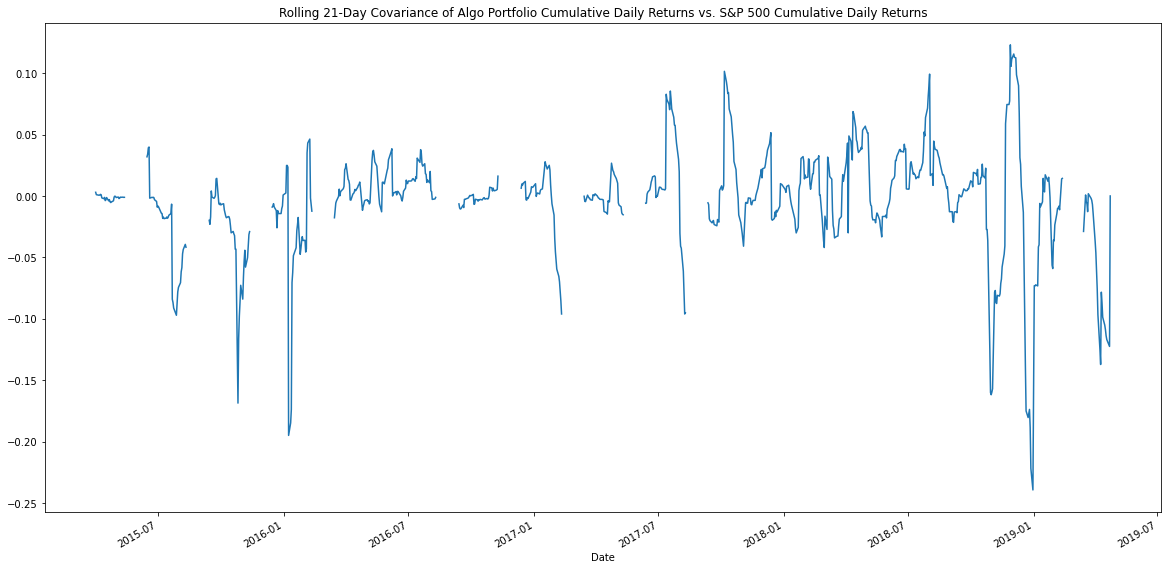

In [399]:
# Computing beta
beta = (covariance_algo / variance)
# Plot beta trend
beta_trend = daily_returns_algo['Algo 1'].rolling(window=21).cov(cumulative_returns['Close'])
beta_trend.plot(figsize=(20, 10), title='Rolling 21-Day Covariance of Algo Portfolio Cumulative Daily Returns vs. S&P 500 Cumulative Daily Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

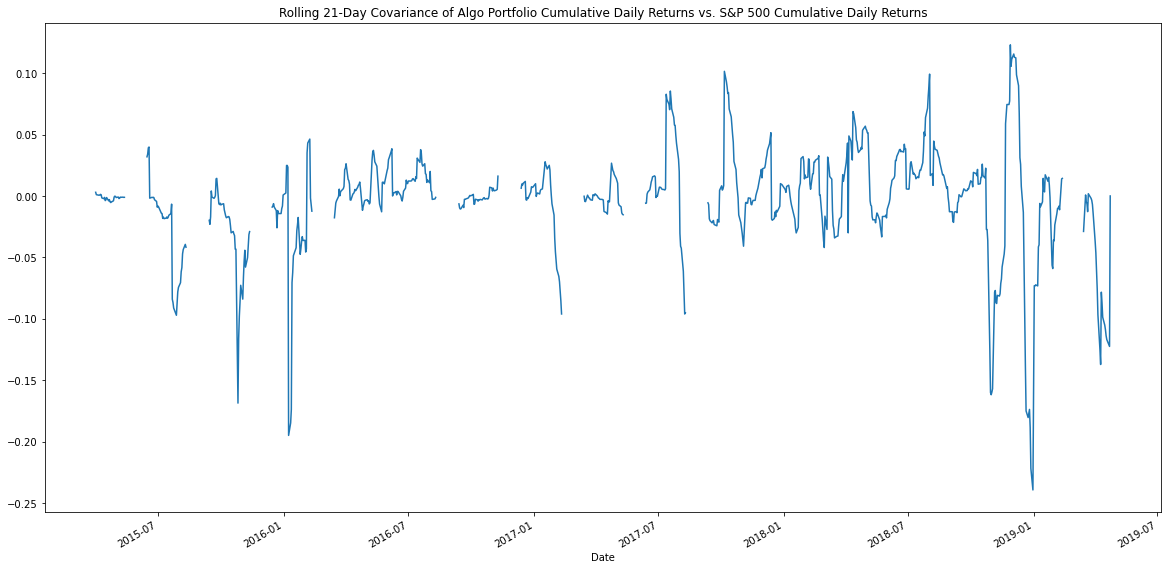

In [401]:
# Use `ewm` to calculate the rolling window
beta_trend = daily_returns_algo['Algo 1'].rolling(window=21).cov(cumulative_returns['Close'])
beta_trend.plot(figsize=(20, 10), title='Rolling 21-Day Covariance of Algo Portfolio Cumulative Daily Returns vs. S&P 500 Cumulative Daily Returns')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [402]:
# Annualized Sharpe Ratios
sharpe_ratios = (cumulative_returns.mean() * 252) / (annualized_std * np.sqrt(252))
sharpe_ratios.head()

SOROS FUND MANAGEMENT LLC     -0.365425
PAULSON & CO.INC.             -1.350564
TIGER GLOBAL MANAGEMENT LLC   -0.150481
BERKSHIRE HATHAWAY INC        -1.042616
Algo 1                        -0.152376
dtype: float64

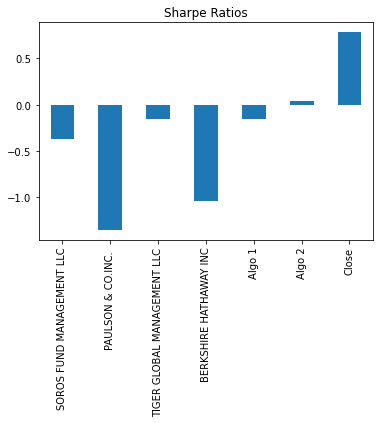

In [403]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [3]:
# Comparison of portfolios
print('Yes, Algo strategies have a higher sharpe ratio than S&P 500 but as Whale portfolio has more sharpe ratio value, algo does not outperform whale portfolios')

Yes, Algo strategies have a higher sharpe ratio than S&P 500 but as Whale portfolio has more sharpe ratio value, algo does not outperform whale portfolios


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [405]:
# Reading data from 1st stock : GOOG
google_data = Path("Resources/goog_historical.csv")
google_df = pd.read_csv(
    google_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
google_df.sort_index(inplace=True)
google_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [406]:
# Reading data from 2nd stock : AAPL
apple_data = Path("Resources/aapl_historical.csv")
apple_df = pd.read_csv(
    apple_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
apple_df.sort_index(inplace=True)
apple_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [407]:
# Reading data from 3rd stock : COST
cost_data = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(
    cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
cost_df.sort_index(inplace=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [408]:
# Combine all stocks in a single DataFrame

combined_stocks_df = pd.concat([google_df, apple_df,cost_df], axis="columns", join="inner")
combined_stocks_df

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
...,...,...,...,...,...,...
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18


In [409]:
# Reset Date index
combined_stocks_df.sort_indexcombined_stocksplace=True
combined_stocks_df.count()

Symbol    250
NOCP      250
Symbol    250
NOCP      250
Symbol    250
NOCP      250
dtype: int64

In [410]:
# Reorganize portfolio data by having a Symboler symbol
combined_stocks_df = combined_stocks_df.drop(columns=["Symbol"])
#combined_stocks_df.columns = ['GOOG', 'AAPL', 'COST']
combined_stocks_df.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [411]:
combined_stocks_df.columns = ['GOOG', 'AAPL', 'COST']
combined_stocks_df.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [412]:
# Calculate daily returns
daily_returns = combined_stocks_df.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna()
#Display sample data
daily_returns.sample()

,GOOG,AAPL,COST
Trade DATE,,,
2019-04-09,-0.005474,-0.002999,-0.006531


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [413]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [414]:
# Join your returns DataFrame to the original returns DataFrame
joined_df = pd.concat([portfolio_returns,daily_returns], axis="columns", join="inner")
joined_df.columns = ['COMBINED', 'GOOG', 'AAPL', 'COST']
joined_df.head()

,COMBINED,GOOG,AAPL,COST
Trade DATE,,,,
2018-05-14,0.000015,0.001766,-0.002333,0.000613
2018-05-15,-0.010064,-0.019060,-0.009088,-0.002042
2018-05-16,0.009403,0.002354,0.009333,0.016523
2018-05-17,-0.001595,-0.002940,-0.006324,0.004479
2018-05-18,-0.006061,-0.011339,-0.003637,-0.003206


In [415]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df = joined_df.dropna()
joined_df.head()

,COMBINED,GOOG,AAPL,COST
Trade DATE,,,,
2018-05-14,0.000015,0.001766,-0.002333,0.000613
2018-05-15,-0.010064,-0.019060,-0.009088,-0.002042
2018-05-16,0.009403,0.002354,0.009333,0.016523
2018-05-17,-0.001595,-0.002940,-0.006324,0.004479
2018-05-18,-0.006061,-0.011339,-0.003637,-0.003206


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [416]:
# Calculate the annualized `std`
annual_std = joined_df.std() * np.sqrt(252)
annual_std.sort_values(inplace=True)
annual_std

COST        0.209320
COMBINED    0.210262
GOOG        0.263554
AAPL        0.296955
dtype: float64

### Calculate and plot rolling `std` with 21-day window

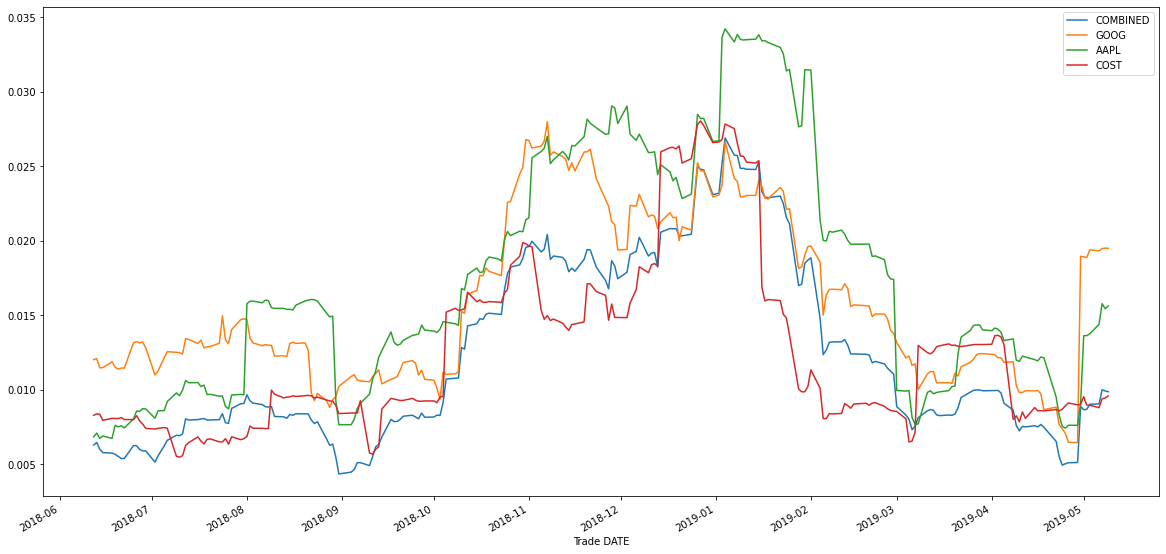

In [417]:
# Calculate rolling standard deviation
joined_df.rolling(window=21).std().plot(figsize=(20,10))
# Plot rolling standard deviation


### Calculate and plot the correlation

In [419]:
# Calculate and plot the correlation
correlation_df = joined_df.corr()
correlation_df

,COMBINED,GOOG,AAPL,COST
COMBINED,1.000000,0.853984,0.881676,0.687446
GOOG,0.853984,1.000000,0.655007,0.385145
AAPL,0.881676,0.655007,1.000000,0.413546
COST,0.687446,0.385145,0.413546,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [421]:
# Calculate and plot Beta
covariance_df = joined_df['COMBINED'].cov(daily_returns_sp500['Close'])
covariance_df

# Calculate variance of all daily returns of combined vs. S&P 500
variance_df = daily_returns_sp500['Close'].var()
variance_df

beta_own_portfolio = covariance_df / variance_df
beta_own_portfolio

1.6911206525163447

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [422]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (joined_df.mean() * 252) / (joined_df.std() * np.sqrt(252))
sharpe_ratios

COMBINED    0.701280
GOOG        0.349657
AAPL        0.361306
COST        1.160482
dtype: float64

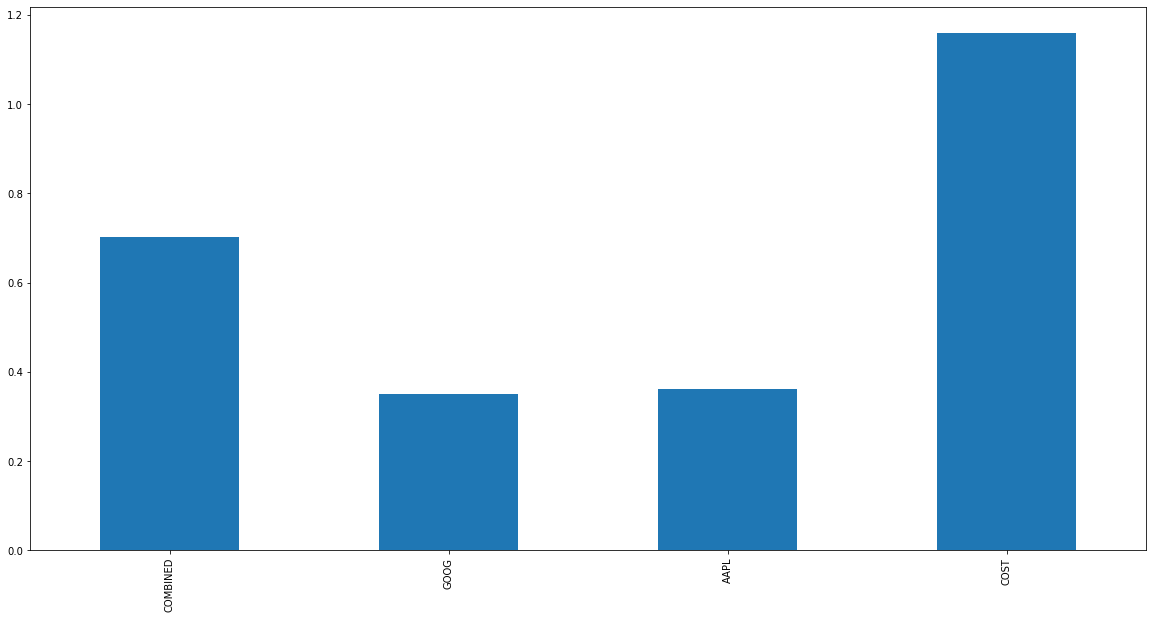

In [423]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', figsize=(20,10))

### How does your portfolio do?

Write your answer here!

In [424]:
print('My Portfolio does better than Google,apple and does not do better than Costco')

My Portfolio does better than Google,apple and does not do better than Costco
